<a href="https://colab.research.google.com/github/amilafr/algo-python-pro2/blob/main/M3L2_Data_grouping_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data grouping methods

[PPT M3L2 ENG](https://docs.google.com/presentation/d/1T9ciwX7B-YN_OOgzCLl9QFyqmePY_4OLPnPoUu3Re0I/edit?usp=sharing)

Grouping is a method of processing data in which data is combined into groups based on one or more characteristics.


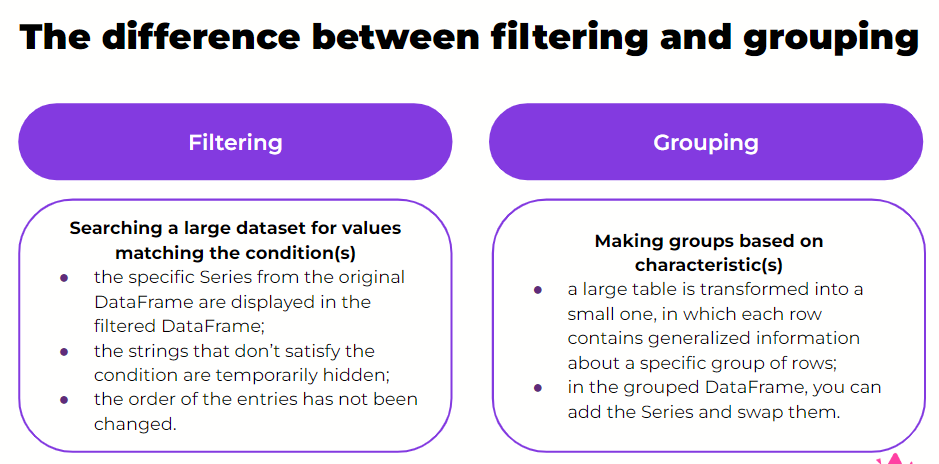

## value_counts()

The value_counts() method calculates the number of unique values for a characteristic in a column. The method returns the Series object containing unique values of characteristics and the number of rows in the DataFrame with each value.


In [2]:
import pandas as pd

df = pd.read_csv("GoogleApps.csv")

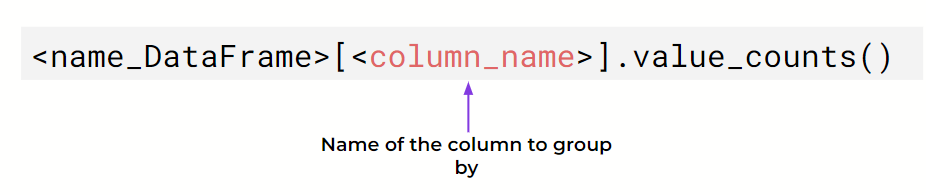

In [6]:
# grouping --> mengelompokkan data berdasarkan content rating
df['Content Rating'].value_counts()

Content Rating
Everyone        6166
Teen             868
Everyone 10+     318
Name: count, dtype: int64

In [7]:
print(df['Content Rating'].value_counts())

Content Rating
Everyone        6166
Teen             868
Everyone 10+     318
Name: count, dtype: int64


## Tasks

### 1. Calculate how many times the number of apps for the “all users” audience exceeds the number of apps for the “10+” users using the value_counts() method.

In [10]:
'''
Calculate how many more apps there are for all users
than there are for the “10+” users.

Everyone ➜ the number of apps for all users,
Everyone_10 ➜ the number of apps for users 10+.
'''

# disimpan dalam variabel temp
temp = df['Content Rating'].value_counts()

# print untuk everyone users
print(temp['Everyone'])

6166


In [11]:
everyone = temp['Everyone']
everyone_10 = temp['Everyone 10+']

# hasil
print(everyone / everyone_10)

19.38993710691824


### 2. What is the average app size for each target audience?

The **groupby()** method lets us group data by one or more characteristics and calculate the necessary statistics for the grouped data.

### groupby()

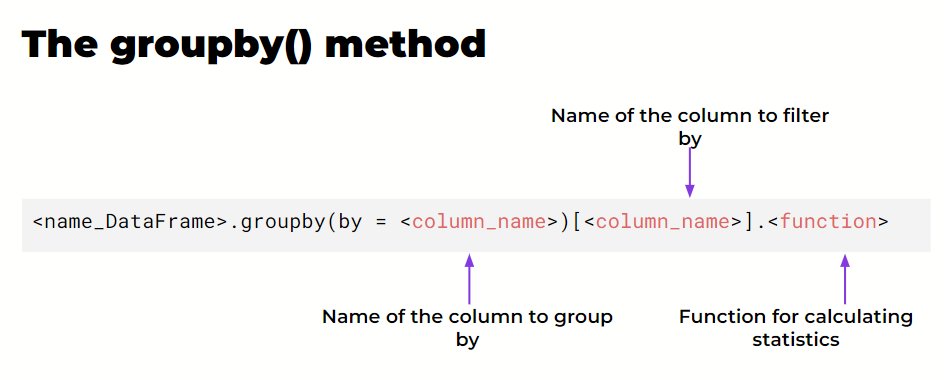

In [13]:
# rata2 app size tiap kategori target audience (content rating)
df.groupby(by = 'Content Rating')['Size'].mean()

Content Rating
Everyone        20.397063
Everyone 10+    40.733419
Teen            33.041953
Name: Size, dtype: float64

### 3. What are the minimum and maximum sizes of the paid and free apps for each target audience?

### agg()

The **aggregate()** method (abbreviated as agg()) allows us to apply multiple functions to the grouped data at once to calculate statistics. As a parameter, this method takes a list of function names in the form of string constants.


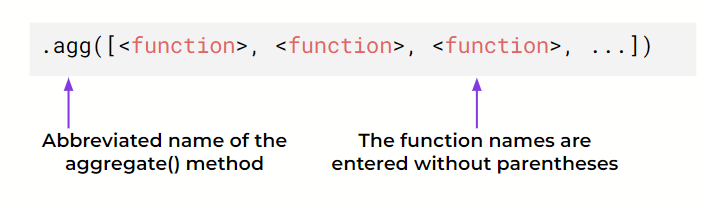

In [14]:
df.groupby(by = 'Type')['Size'].agg(['min', 'max'])

,min,max
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


In [15]:
print(df.groupby(by = 'Type')['Size'].agg(['min', 'max']))

           min    max
Type                 
Free  0.008301  100.0
Paid  0.013672  100.0


# Grouping data by multiple characteristics

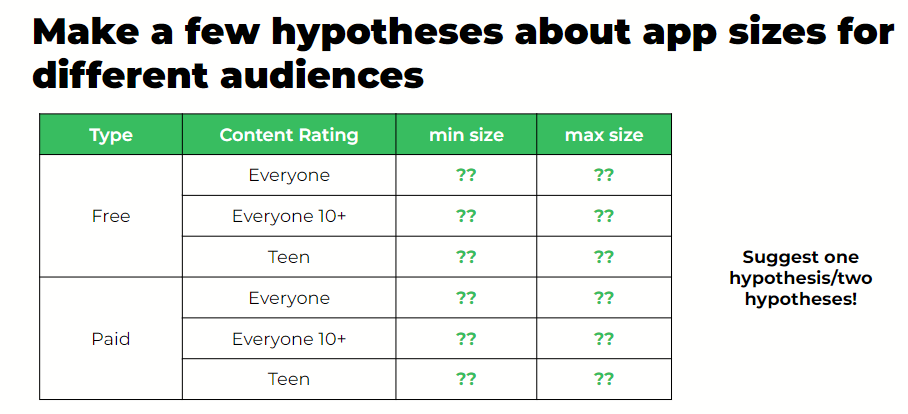

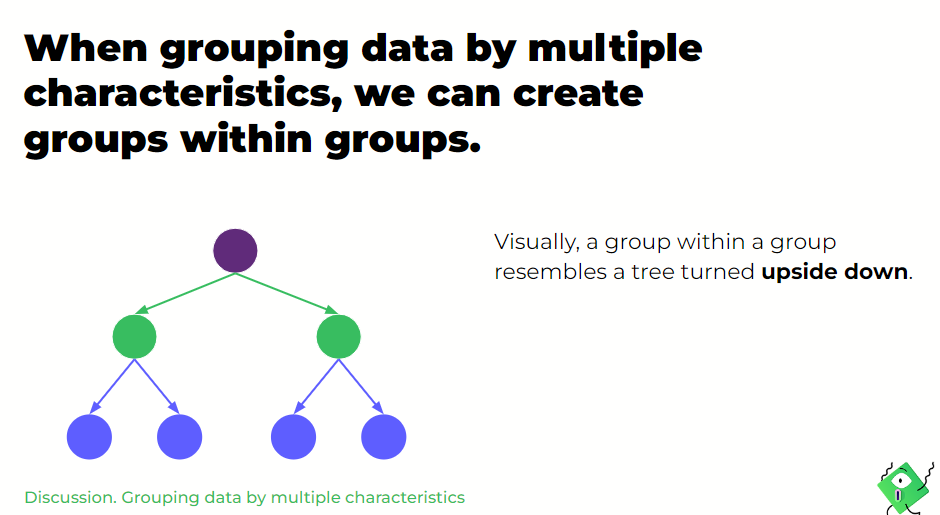

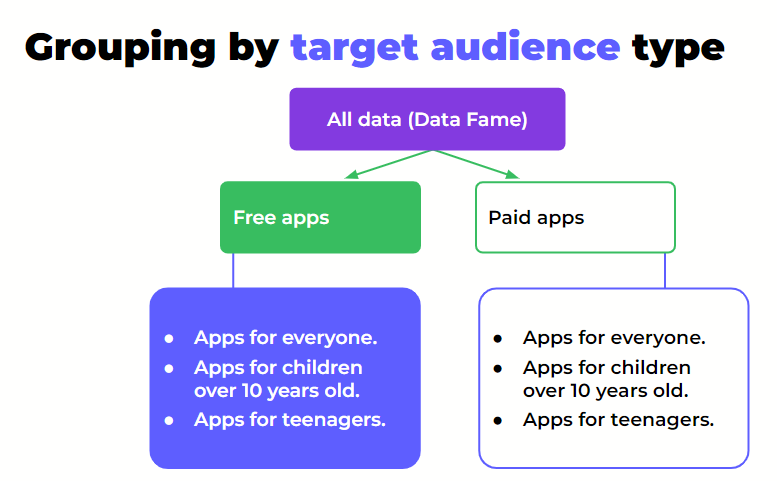

## Groupby for multiple characteristics

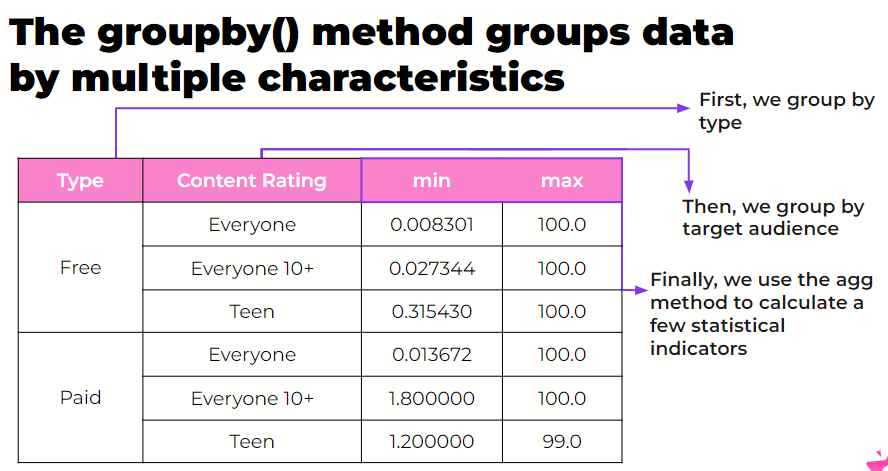

In [3]:
# 1 karakteristik
df.groupby(by = 'Type')['Size'].agg(['max', 'min'])

,max,min
Type,,
Free,100.0,0.008301
Paid,100.0,0.013672


In [4]:
# 2 karakteristik
df.groupby(by = ['Type','Content Rating'])['Size'].agg(['max', 'min'])

max       min
Type Content Rating                 
Free Everyone        100.0  0.008301
     Everyone 10+    100.0  0.027344
     Teen            100.0  0.315430
Paid Everyone        100.0  0.013672
     Everyone 10+    100.0  1.800000
     Teen             99.0  1.200000

In [5]:
df.groupby(by = ['Content Rating', 'Type'])['Size'].agg(['max', 'min'])

max       min
Content Rating Type                 
Everyone       Free  100.0  0.008301
               Paid  100.0  0.013672
Everyone 10+   Free  100.0  0.027344
               Paid  100.0  1.800000
Teen           Free  100.0  0.315430
               Paid   99.0  1.200000

## Reset Index --> reset_index()

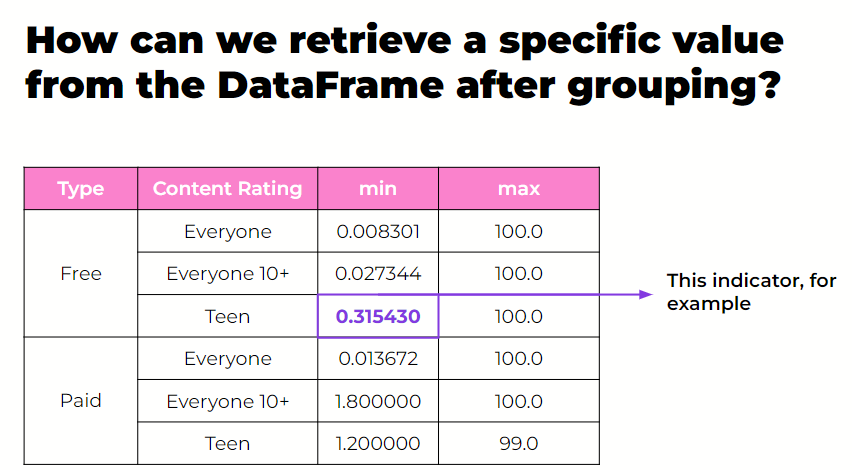

In [7]:
temp = df.groupby(by = ['Type','Content Rating'])['Size'].agg(['max', 'min'])
print(['min']['Free']['Teen'])

<>:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<ipython-input-7-3520c7c47654>:2: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  print(['min']['Free']['Teen'])


TypeError: list indices must be integers or slices, not str

The **reset_index()** method allows us to turn indexes into values by reindexing the rows in the DataFrame.

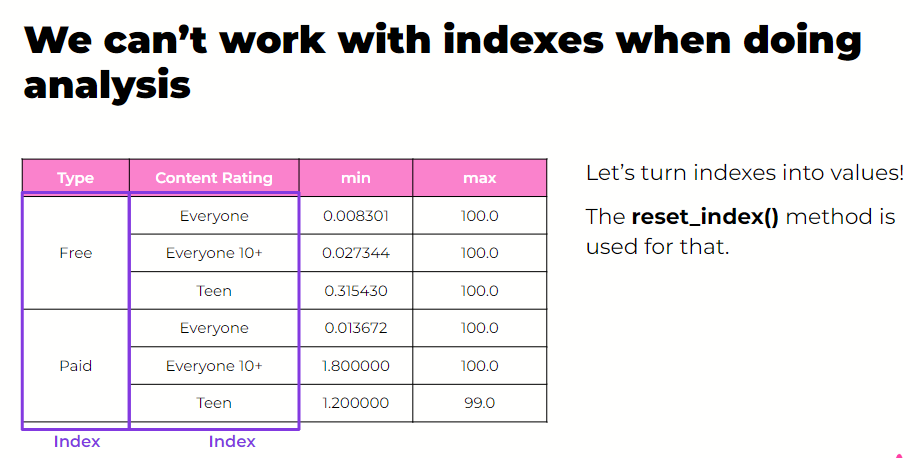

In [9]:
temp.reset_index()

,Type,Content Rating,max,min
0,Free,Everyone,100.0,0.008301
1,Free,Everyone 10+,100.0,0.027344
2,Free,Teen,100.0,0.315430
3,Paid,Everyone,100.0,0.013672
4,Paid,Everyone 10+,100.0,1.800000
5,Paid,Teen,99.0,1.200000


## Pivot Table --> pivot_table()

A pivot table is a means of generalizing data for further analysis.

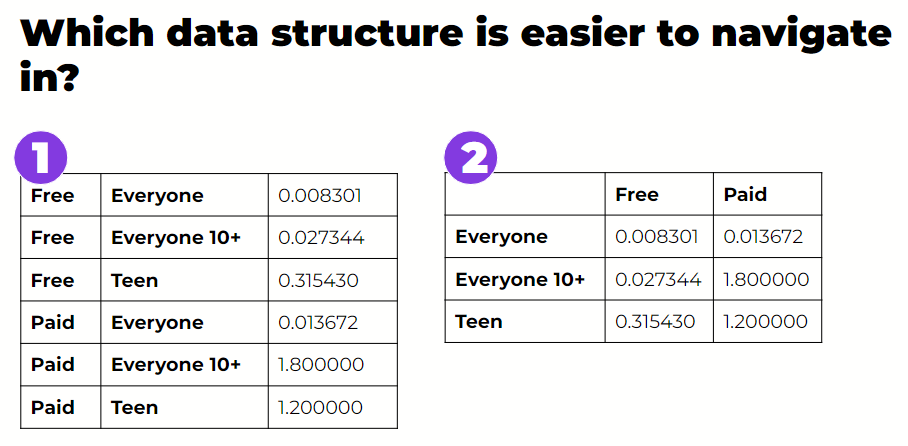

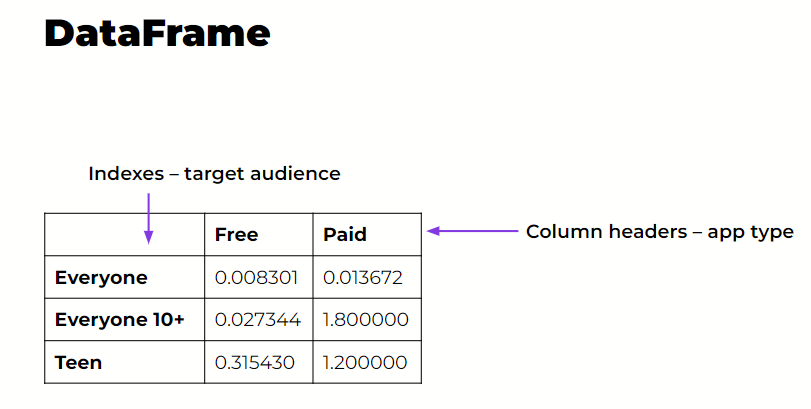

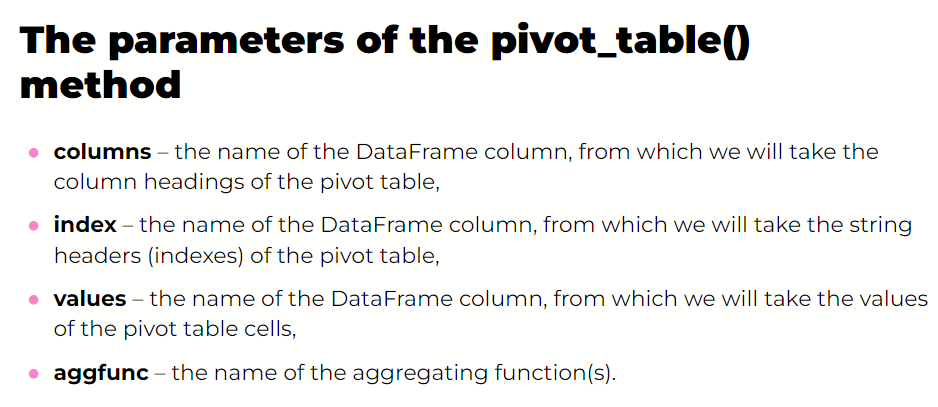

In [10]:
df.pivot_table(columns = 'Type',
               index = 'Content Rating',
               values = 'Size',
               aggfunc = 'min')

Type,Free,Paid
Content Rating,,
Everyone,0.008301,0.013672
Everyone 10+,0.027344,1.800000
Teen,0.315430,1.200000


In [11]:
df.pivot_table(columns = 'Type',
               index = 'Content Rating',
               values = 'Size',
               aggfunc = ['min', 'max'])

min              max       
Type                Free      Paid   Free   Paid
Content Rating                                  
Everyone        0.008301  0.013672  100.0  100.0
Everyone 10+    0.027344  1.800000  100.0  100.0
Teen            0.315430  1.200000  100.0   99.0

# Solutions

## 1

In [6]:
import pandas as pd

df = pd.read_csv('GoogleApps.csv')

# 1 How many apps in the 'BUSINESS' 'Category' are there?
print('Jumlah apps kategori Business')
print(df['Category'].value_counts(), '\n')

# 2 What is the ratio of apps for teenagers ('Teen') to those for children over 10 years old ('Everyone 10+')?
# Round the answer to the nearest hundredth.
print('Rasio apps Teen ke Everyone 10+')

temp = df['Content Rating'].value_counts()
res = temp['Teen'] / temp['Everyone 10+']
print(round(res, 2), '\n')

# 3.1 What is the average 'Rating' of 'Paid' apps?
# Round the answer to the nearest hundredth.
print('Rata-rata Rating dari Paid app')

temp = df.groupby(by = 'Type')['Rating'].mean()
res = temp['Paid']
print(round(res, 2), '\n')

# 3.2 How much lower is the average 'Rating' of 'Free' apps than the average rating of 'Paid' apps?
# Round the answer to the nearest hundredth.
print('Perbedaan rata-rata Rating Free dan Paid')

temp = df.groupby(by = 'Type')['Rating'].mean()
res = temp['Paid'] - temp['Free']
print(round(res, 2))

# 4 What are the minimum and maximum app 'Size' in the 'COMICS' 'Category'?
# Round the answer to the nearest hundredth.
print('Size minimum dan maximum dari app kategori Comics')
print(df.groupby(by = 'Category')['Size'].agg(['min', 'max']))

# Bonus 1. How many apps have a 'Rating' of strictly greater than 4.5 in the 'FINANCE' 'Category'?
print('Jumlah app yang punya rating > 4.5 di category finance')
temp = df[df['Rating'] > 4.5]['Category'].value_counts()
print(temp['FINANCE'])

# Bonus 2. What is the ratio of 'Free' to 'Paid' games with a 'Rating' greater than 4.9?
print('Rasio free/paid GAME yang rating > 4.9')
temp = df[(df['Rating'] > 4.9) & (df['Category'] == 'GAME')]['Type'].value_counts()
print(temp['Free'] / temp['Paid'])

Jumlah apps kategori Business
Category
FAMILY                 1574
GAME                    911
TOOLS                   631
MEDICAL                 318
LIFESTYLE               275
PERSONALIZATION         270
FINANCE                 266
BUSINESS                246
SPORTS                  245
PRODUCTIVITY            234
PHOTOGRAPHY             231
HEALTH_AND_FITNESS      216
COMMUNICATION           206
SHOPPING                176
NEWS_AND_MAGAZINES      162
TRAVEL_AND_LOCAL        159
SOCIAL                  142
BOOKS_AND_REFERENCE     142
VIDEO_PLAYERS           114
EDUCATION               108
MAPS_AND_NAVIGATION      94
FOOD_AND_DRINK           84
ENTERTAINMENT            84
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       61
ART_AND_DESIGN           58
HOUSE_AND_HOME           56
WEATHER                  51
PARENTING                43
COMICS                   42
EVENTS                   38
BEAUTY                   36
DATING                   16
Name: count, dtype: int64 

Rasio app

## 2